Nama: Filbert Naldo Wijaya

NIM: 2702235696

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read data

data = pd.read_csv('creditcard.csv')

In [3]:
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


# Exploratory Data Analysis (EDA)

In [4]:
# Descriptive analysis of amount

data['Amount'].describe()

,Amount
count,284807.000000
mean,88.349619
std,250.120109
min,0.000000
25%,5.600000
50%,22.000000
75%,77.165000
max,25691.160000


Insight: Rata-rata jumlah transaksi credit card adalah 88.35, dengan range dari 0 sampai 25691.16

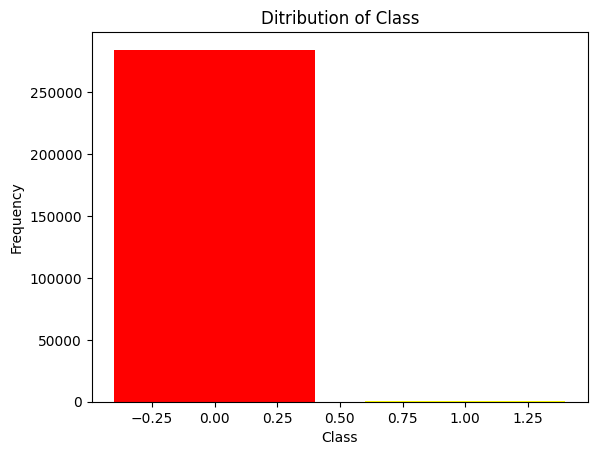

Class
0    284315
1       492
Name: count, dtype: int64


In [5]:
# Show the distribution of gender

class_counts = data['Class'].value_counts()

plt.bar(class_counts.index, class_counts.values, color=['red', 'yellow'])
plt.title("Ditribution of Class")
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.show()

print(class_counts)

Insight: Distribusi class sangat tidak balance. Kasus fraud sangat jarang terjadi, hanya sekitar 0.17% dari total data. Maka harus dilakukan oversampling untuk membuat data menjadi balance

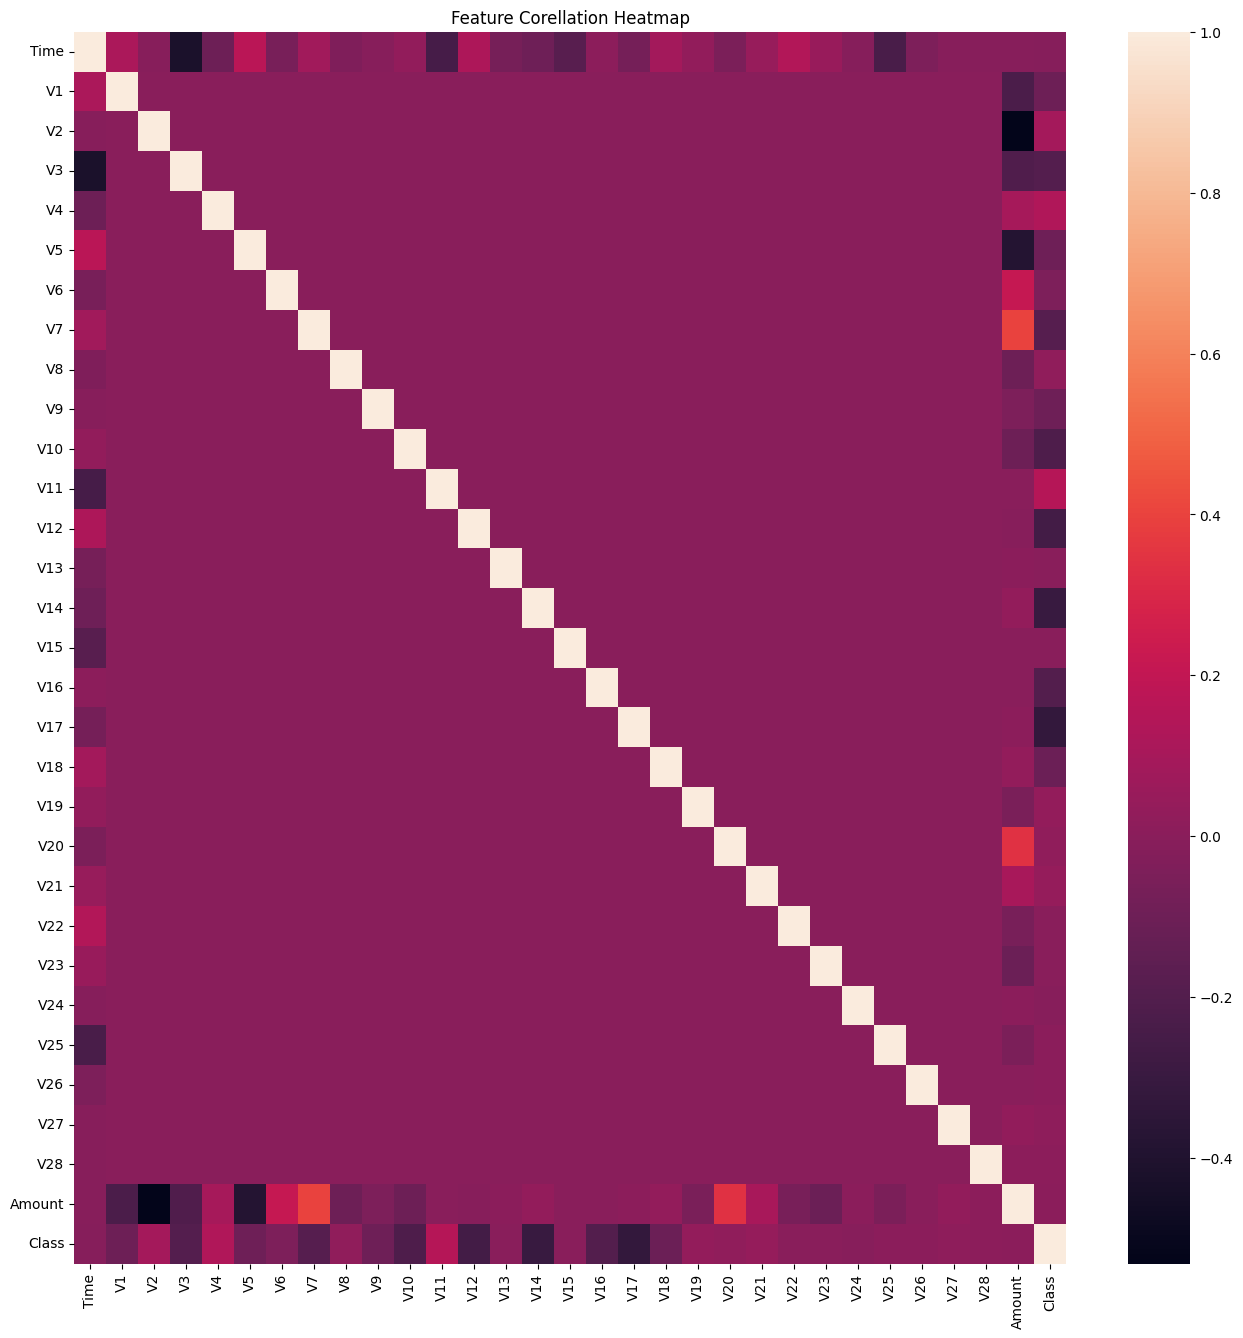

In [6]:
# show heatmap

plt.figure(figsize=(16, 16))
sns.heatmap(data.corr())
plt.title("Feature Corellation Heatmap")
plt.show()

Hampir semua feature tidak memiliki korelasi yang kuat satu sama lain (kebanyakan korelasinya mendekati 0). Jika dilihat korelasinya dengan Class, ada beberapa yang berkorelasi cukup negatif seperti V12, V14, dan V17

In [7]:
# calculate the average and median amount by class

amount_stats = data.groupby("Class")["Amount"].agg(["mean", "median"]).reset_index()

amount_stats.columns = ["Class", "Average Amount", "Median Amount"]

amount_stats["Average Amount"] = amount_stats["Average Amount"].round(2)
amount_stats["Median Amount"] = amount_stats["Median Amount"].round(2)

print("Amount Statistics by Class:\n", amount_stats)

Amount Statistics by Class:
    Class  Average Amount  Median Amount
0      0           88.29          22.00
1      1          122.21           9.25


Insight:
Rata-rata amount pada class 0 (non-fraud), adalah sekitar 88.29 dengan median sebesar 22. Sedangkan, rata-rata amount pada class 1 (fraud) sekitar 40% lebih besar dibandingkan class 0, yaitu dengan rata-rata sebesar 122.21 dengan median sebesar 9.25. Artinya, data fraud cenderung memiliki jumlah transaksi yang lebih besar

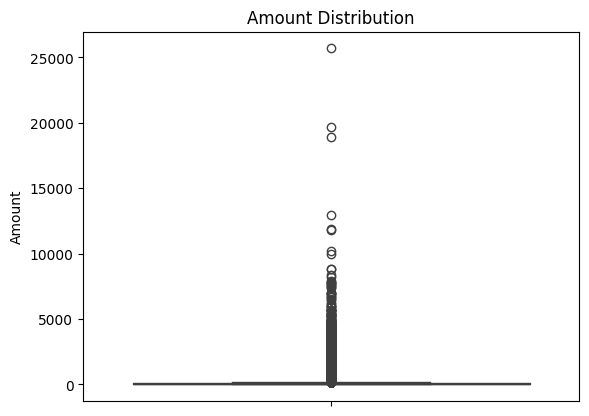

In [8]:
# Boxplot of Amount

sns.boxplot(data['Amount'])
plt.title("Amount Distribution")
plt.show()

Insight:

Feature Amount memiliki outlier yang banyak dan ekstrim. Artinya, perlu di-standardize.

# Data Preprocessing

In [ ]:
# check data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
# check sum of missing values for each column in data

data.isna().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [ ]:
# check if there is duplicate values in data

data.duplicated().sum()

np.int64(1081)

ada 1081 data duplikat

In [ ]:
# drop duplicates

data.drop_duplicates(inplace=True)

In [ ]:
# check again

data.duplicated().sum()

np.int64(0)

In [ ]:
# describe data

data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,...,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,94811.077600,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,...,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,88.472687,0.001667
std,47481.047891,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,...,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,250.399437,0.040796
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54204.750000,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,...,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000,0.000000
50%,84692.500000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,...,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000,0.000000
75%,139298.000000,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,...,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,77.510000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


In [ ]:
# drop data yang ada missing value
data.dropna(inplace=True)

In [ ]:
data.shape

(283726, 31)

In [ ]:
data.isna().sum() # no missing values

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [ ]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
# train test split

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

X = data.drop('Class', axis=1)
y = data['Class']

# standardize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# apply smote
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X_scaled, y)

# 80:20
X_train, X_test, y_train, y_test = train_test_split(
    X_balanced, y_balanced, test_size=0.2, random_state=42, stratify=y_balanced
)

print("train:", X_train.shape)
print("test:", X_test.shape)

train: (453204, 30)
test: (113302, 30)


# Dimensionality Reduction

## Linear Discriminant Analysis (LDA)

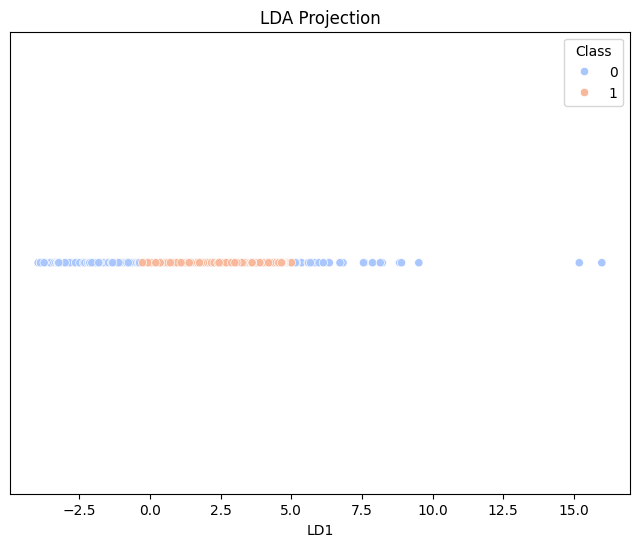

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# n-1 class
lda = LDA(n_components=1)
X_lda = lda.fit_transform(X_train, y_train)

# to df
lda_df = pd.DataFrame()
lda_df['LD1'] = X_lda.flatten()
lda_df['Class'] = y_train.values

# plotting
plt.figure(figsize=(8, 6))
sns.scatterplot(data=lda_df, x='LD1', y=[0]*len(lda_df), hue='Class', palette='coolwarm')
plt.title('LDA Projection')
plt.xlabel('LD1')
plt.yticks([])
plt.show()

Berdasarkan plot, terlihat bahwa ada tumpang tindih antara kedua class. Class biru lebih menyebar, sedangkan class orange lebih terkonsentrasi. Dapat disimpulkan bahwa hasil LDA belum sempurna, sehingga ada potensi hasil klasifikasi akan kurang akurat.

## t-Distributed Stochastic Neighbor Embedding (t-SNE)

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


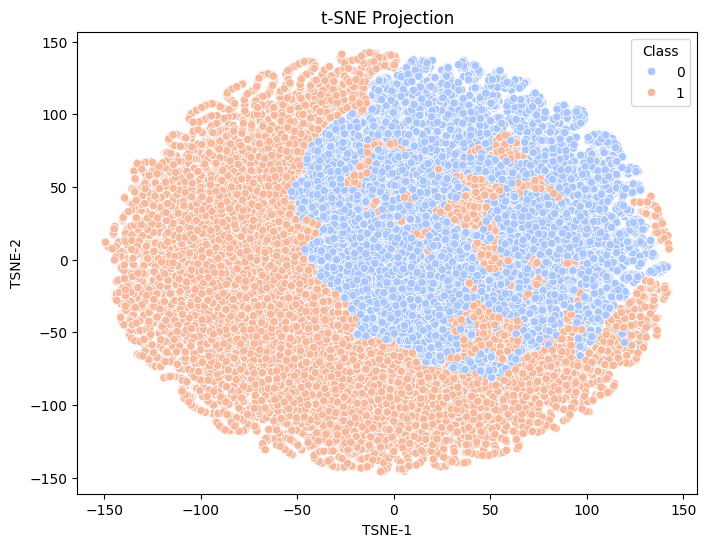

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
X_tsne = tsne.fit_transform(X_train)

# to df
tsne_df = pd.DataFrame()
tsne_df['TSNE-1'] = X_tsne[:, 0]
tsne_df['TSNE-2'] = X_tsne[:, 1]
tsne_df['Class'] = y_train.values

# plotting
plt.figure(figsize=(8, 6))
sns.scatterplot(data=tsne_df, x='TSNE-1', y='TSNE-2', hue='Class', palette='coolwarm')
plt.title('t-SNE Projection')
plt.xlabel('TSNE-1')
plt.ylabel('TSNE-2')
plt.legend(title='Class')
plt.show()

Berdasarkan plot, terlihat kedua class terpisah dengan cukup baik serta tidak banyak tumpang tindih.

# Model

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# baseline
base_model = LogisticRegression(max_iter=1000)
base_scores = cross_val_score(base_model, X_balanced, y_balanced, cv=10)

# LDA
lda = LDA(n_components=1)
X_lda_all = lda.fit_transform(X_balanced, y_balanced)
lda_model = LogisticRegression(max_iter=1000)
lda_scores = cross_val_score(lda_model, X_lda_all, y_balanced, cv=10)

# summary
print(f"Baseline: {base_scores.mean():.4f}")
print(f"LDA: {lda_scores.mean():.4f}")

Baseline: 0.9433
LDA: 0.9315


Hasil CV dengan menggunakan LDA masih kalah jika dibandingkan baseline. Artinya, LDA kurang efektif untuk klasifikasi pada dataset ini.

## Hyperparameter Tuning

In [ ]:
# ignore warnings
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l2'],
    'solver': ['lbfgs'],
    'max_iter': [1000]
}

# Baseline
base_model = LogisticRegression()
grid_base = GridSearchCV(base_model, param_grid, cv=10, scoring='accuracy')
grid_base.fit(X_balanced, y_balanced)
best_base_score = grid_base.best_score_
best_base_params = grid_base.best_params_

# LDA
lda = LDA(n_components=1)
X_lda_all = lda.fit_transform(X_balanced, y_balanced)
lda_model = LogisticRegression()
grid_lda = GridSearchCV(lda_model, param_grid, cv=10, scoring='accuracy')
grid_lda.fit(X_lda_all, y_balanced)
best_lda_score = grid_lda.best_score_
best_lda_params = grid_lda.best_params_

# Summary
print(f"Baseline (tuned): {best_base_score:.4f}, Best Params: {best_base_params}")
print(f"LDA (tuned): {best_lda_score:.4f}, Best Params: {best_lda_params}")

Baseline (tuned): 0.9433, Best Params: {'C': 100, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'lbfgs'}
LDA (tuned): 0.9315, Best Params: {'C': 1, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'lbfgs'}


Setelah di-tuning, hasil CV dengan menggunakan LDA masih kalah jika dibandingkan baseline.